## **AIRCRAFT WILDLIFE STRIKES: DATA VISUALIZATION AND PREDICTIVE DAMAGE ASSESMENT.**

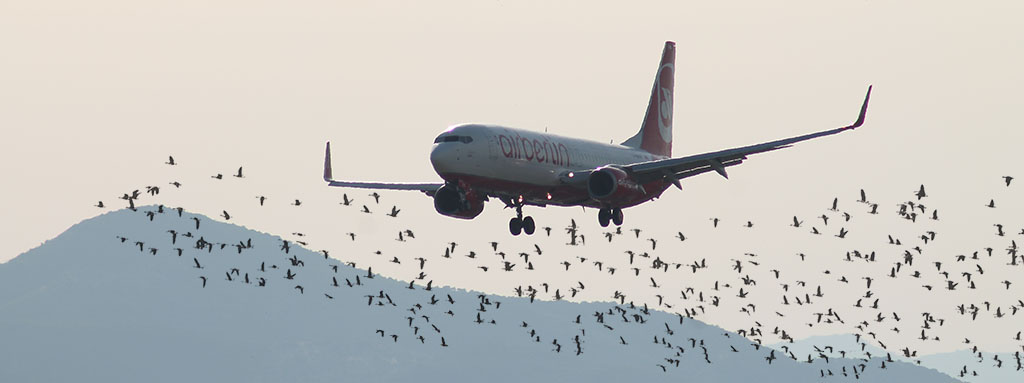

### **CONTENT OVERVIEW**
### 1.Introduction.
### 2.Data Inspection.
### 3.Data Visualization and Preprocessing.
### 4.Predictive Analytics.
### 5.Conclusions and Suggestions.

### **INTRODUCTION.**
Airplane wildlife strikes, such as those involving birds, are a serious concern for aviation safety. This project focuses on analyzing data related to these incidents to better understand when and where they occur.


The dataset contains wildlife strikes recorded from 2005 to 2011 with 65610 rows and 22 features. In this report, I conduct a comprehensive analysis of a bird strike dataset, emphasizing key dimensions such as aircraft details, bird characteristics, flight specifics, timing, and incident outcomes. The objective is to predict whether a wildlife strike causes damage to the aircraft.

Importing necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report


Data Import:The bird strikes data set is imported.

In [ ]:
df=pd.read_csv('/content/Bird Strikes Test.csv',low_memory=False,thousands=',')
df.drop(['Record ID'],axis=1,inplace=True)
df

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,No damage,2,NORTHWEST AIRLINES,Michigan,Climb,...,NaN,NaN,NaN,NaN,0,0,0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,No damage,2,NORTHWEST AIRLINES,Wisconsin,Take-off run,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,Caused damage,1,PRIVATELY OWNED,Tennessee,Landing Roll,...,NaN,Day,NaN,NaN,0,0,0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,NaN,1/1/2005 0:00,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,...,2140.0,Night,Y,NaN,0,117135,117135,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,No damage,2,UNITED AIRLINES,NaN,Landing Roll,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65605,CHARLOTTE/DOUGLAS INTL ARPT,< 1000 ft,A-319,NaN,12/31/2011 0:00,No damage,2,US AIRWAYS,North Carolina,Climb,...,1025.0,Day,NaN,NaN,0,0,0,0.0,75.0,140.0
65606,KANSAS CITY INTL,Unknown,UNKNOWN,NaN,12/31/2011 0:00,No damage,NaN,UNKNOWN,Missouri,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN
65607,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,NaN,12/31/2011 0:00,Caused damage,2,XTRA AIRWAYS,Illinois,Take-off run,...,1026.0,Day,N,5.0,0,0,0,0.0,0.0,165.0
65608,PORTLAND INTL (OR),Unknown,B-737-300,Precautionary Landing,12/31/2011 0:00,Caused damage,2,SOUTHWEST AIRLINES,Oregon,Climb,...,1220.0,Day,Y,NaN,0,252000,252000,0.0,NaN,NaN


### **DATA INSPECTION.**

In the initial phase of our analysis, we delve into data inspection, meticulously examining the dataset to understand its structure, quality, and potential insights.

### Removing Duplicate Rows.




In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=True,ignore_index=True)
df

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,No damage,2,NORTHWEST AIRLINES,Michigan,Climb,...,NaN,NaN,NaN,NaN,0,0,0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,No damage,2,NORTHWEST AIRLINES,Wisconsin,Take-off run,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,Caused damage,1,PRIVATELY OWNED,Tennessee,Landing Roll,...,NaN,Day,NaN,NaN,0,0,0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,NaN,1/1/2005 0:00,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,...,2140.0,Night,Y,NaN,0,117135,117135,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,No damage,2,UNITED AIRLINES,NaN,Landing Roll,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64656,CHARLOTTE/DOUGLAS INTL ARPT,< 1000 ft,A-319,NaN,12/31/2011 0:00,No damage,2,US AIRWAYS,North Carolina,Climb,...,1025.0,Day,NaN,NaN,0,0,0,0.0,75.0,140.0
64657,KANSAS CITY INTL,Unknown,UNKNOWN,NaN,12/31/2011 0:00,No damage,NaN,UNKNOWN,Missouri,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN
64658,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,NaN,12/31/2011 0:00,Caused damage,2,XTRA AIRWAYS,Illinois,Take-off run,...,1026.0,Day,N,5.0,0,0,0,0.0,0.0,165.0
64659,PORTLAND INTL (OR),Unknown,B-737-300,Precautionary Landing,12/31/2011 0:00,Caused damage,2,SOUTHWEST AIRLINES,Oregon,Climb,...,1220.0,Day,Y,NaN,0,252000,252000,0.0,NaN,NaN


### Get the First Five Rows of Data

In [ ]:
df.head()

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,No damage,2,NORTHWEST AIRLINES,Michigan,Climb,...,NaN,NaN,NaN,NaN,0,0,0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,No damage,2,NORTHWEST AIRLINES,Wisconsin,Take-off run,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,Caused damage,1,PRIVATELY OWNED,Tennessee,Landing Roll,...,NaN,Day,NaN,NaN,0,0,0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,NaN,1/1/2005 0:00,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,...,2140.0,Night,Y,NaN,0,117135,117135,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,No damage,2,UNITED AIRLINES,NaN,Landing Roll,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN


### Get the Last Five Rows of Data.




In [ ]:
df.tail()

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
64656,CHARLOTTE/DOUGLAS INTL ARPT,< 1000 ft,A-319,NaN,12/31/2011 0:00,No damage,2,US AIRWAYS,North Carolina,Climb,...,1025.0,Day,NaN,NaN,0,0,0,0.0,75.0,140.0
64657,KANSAS CITY INTL,Unknown,UNKNOWN,NaN,12/31/2011 0:00,No damage,NaN,UNKNOWN,Missouri,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN
64658,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,NaN,12/31/2011 0:00,Caused damage,2,XTRA AIRWAYS,Illinois,Take-off run,...,1026.0,Day,N,5.0,0,0,0,0.0,0.0,165.0
64659,PORTLAND INTL (OR),Unknown,B-737-300,Precautionary Landing,12/31/2011 0:00,Caused damage,2,SOUTHWEST AIRLINES,Oregon,Climb,...,1220.0,Day,Y,NaN,0,252000,252000,0.0,NaN,NaN
64660,MURRAY FIELD AIRPORT,< 1000 ft,HOMEBUILT,Other,12/31/2011 0:00,Caused damage,NaN,PRIVATELY OWNED,California,Approach,...,1630.0,Day,NaN,2160.0,1000,7000,8000,0.0,3.0,70.0


### Displaying the shape of Data.

In [ ]:
df.shape

(64661, 22)

### Check the Datatype for each variable

In [ ]:
df.dtypes

Airport: Name                                  object
Altitude bin                                   object
Aircraft: Make/Model                           object
Effect: Impact to flight                       object
FlightDate                                     object
Effect: Indicated Damage                       object
Aircraft: Number of engines?                   object
Aircraft: Airline/Operator                     object
Origin State                                   object
When: Phase of flight                          object
Wildlife: Size                                 object
Wildlife: Species                              object
When: Time (HHMM)                             float64
When: Time of day                              object
Pilot warned of birds or wildlife?             object
Cost: Aircraft time out of service (hours)    float64
Cost: Other (inflation adj)                     int64
Cost: Repair (inflation adj)                    int64
Cost: Total $               

The majority of columns consist of object data types, along with five features containing float values and three features containing integer values.

### Get a quick Statistical description of non-null numeric values in the data.

In [ ]:
df.describe()

,When: Time (HHMM),Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
count,36568.000000,4352.00000,6.466100e+04,6.466100e+04,6.466100e+04,37306.000000,35051.000000,25300.000000
mean,1389.067655,66.18704,3.691516e+02,4.231363e+03,4.600515e+03,0.767143,879.703803,151.564625
std,613.282900,328.93943,2.467831e+04,1.902500e+05,1.943928e+05,7.641154,1844.253946,267.469451
min,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,915.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,120.000000
50%,1410.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,50.000000,140.000000
75%,1930.000000,12.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,900.000000,160.000000
max,2359.000000,6480.00000,5.856751e+06,3.794880e+07,3.794880e+07,1300.000000,31300.000000,9999.000000


Insights:

1.The average incident time is around 1,389 (HHMM format), indicating a broad
distribution throughout the day.

2.Aircraft time out of service averages approximately 66 hours, highlighting the impact on operational efficiency.

3.Repair costs (inflation-adjusted) are substantial, averaging $6,466.10 per incident.



### Get the Column names.

In [ ]:
df.columns

Index(['Airport: Name', 'Altitude bin', 'Aircraft: Make/Model',
       'Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Wildlife: Size',
       'Wildlife: Species', 'When: Time (HHMM)', 'When: Time of day',
       'Pilot warned of birds or wildlife?',
       'Cost: Aircraft time out of service (hours)',
       'Cost: Other (inflation adj)', 'Cost: Repair (inflation adj)',
       'Cost: Total $', 'Miles from airport', 'Feet above ground',
       'Speed (IAS) in knots'],
      dtype='object')

In [ ]:
df.isna().sum()

Airport: Name                                     9
Altitude bin                                      0
Aircraft: Make/Model                              0
Effect: Impact to flight                      61393
FlightDate                                        0
Effect: Indicated Damage                          0
Aircraft: Number of engines?                  22224
Aircraft: Airline/Operator                        0
Origin State                                   6152
When: Phase of flight                         23646
Wildlife: Size                                 8821
Wildlife: Species                                17
When: Time (HHMM)                             28093
When: Time of day                             22848
Pilot warned of birds or wildlife?            36332
Cost: Aircraft time out of service (hours)    60309
Cost: Other (inflation adj)                       0
Cost: Repair (inflation adj)                      0
Cost: Total $                                     0
Miles from a

 It was found that two features have null values above 60000 as our dataset shape is 64661.So these two features is removed from the dataset to ensure data integrity and completeness.

In [ ]:
df.drop(['Effect: Impact to flight','Cost: Aircraft time out of service (hours)'],axis=1,inplace=True)
df

,Airport: Name,Altitude bin,Aircraft: Make/Model,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,1/1/2005 0:00,No damage,2,NORTHWEST AIRLINES,Michigan,Climb,Medium,Unknown bird - medium,NaN,NaN,NaN,0,0,0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,1/1/2005 0:00,No damage,2,NORTHWEST AIRLINES,Wisconsin,Take-off run,Medium,Unknown bird - medium,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,1/1/2005 0:00,Caused damage,1,PRIVATELY OWNED,Tennessee,Landing Roll,Large,White-tailed deer,NaN,Day,NaN,0,0,0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,1/1/2005 0:00,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,2140.0,Night,Y,0,117135,117135,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,1/1/2005 0:00,No damage,2,UNITED AIRLINES,NaN,Landing Roll,Medium,Unknown bird - medium,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64656,CHARLOTTE/DOUGLAS INTL ARPT,< 1000 ft,A-319,12/31/2011 0:00,No damage,2,US AIRWAYS,North Carolina,Climb,Small,Rock pigeon,1025.0,Day,NaN,0,0,0,0.0,75.0,140.0
64657,KANSAS CITY INTL,Unknown,UNKNOWN,12/31/2011 0:00,No damage,NaN,UNKNOWN,Missouri,NaN,Small,Short-eared owl,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN
64658,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,12/31/2011 0:00,Caused damage,2,XTRA AIRWAYS,Illinois,Take-off run,Medium,Red-tailed hawk,1026.0,Day,N,0,0,0,0.0,0.0,165.0
64659,PORTLAND INTL (OR),Unknown,B-737-300,12/31/2011 0:00,Caused damage,2,SOUTHWEST AIRLINES,Oregon,Climb,Medium,Glaucous-winged gull,1220.0,Day,Y,0,252000,252000,0.0,NaN,NaN


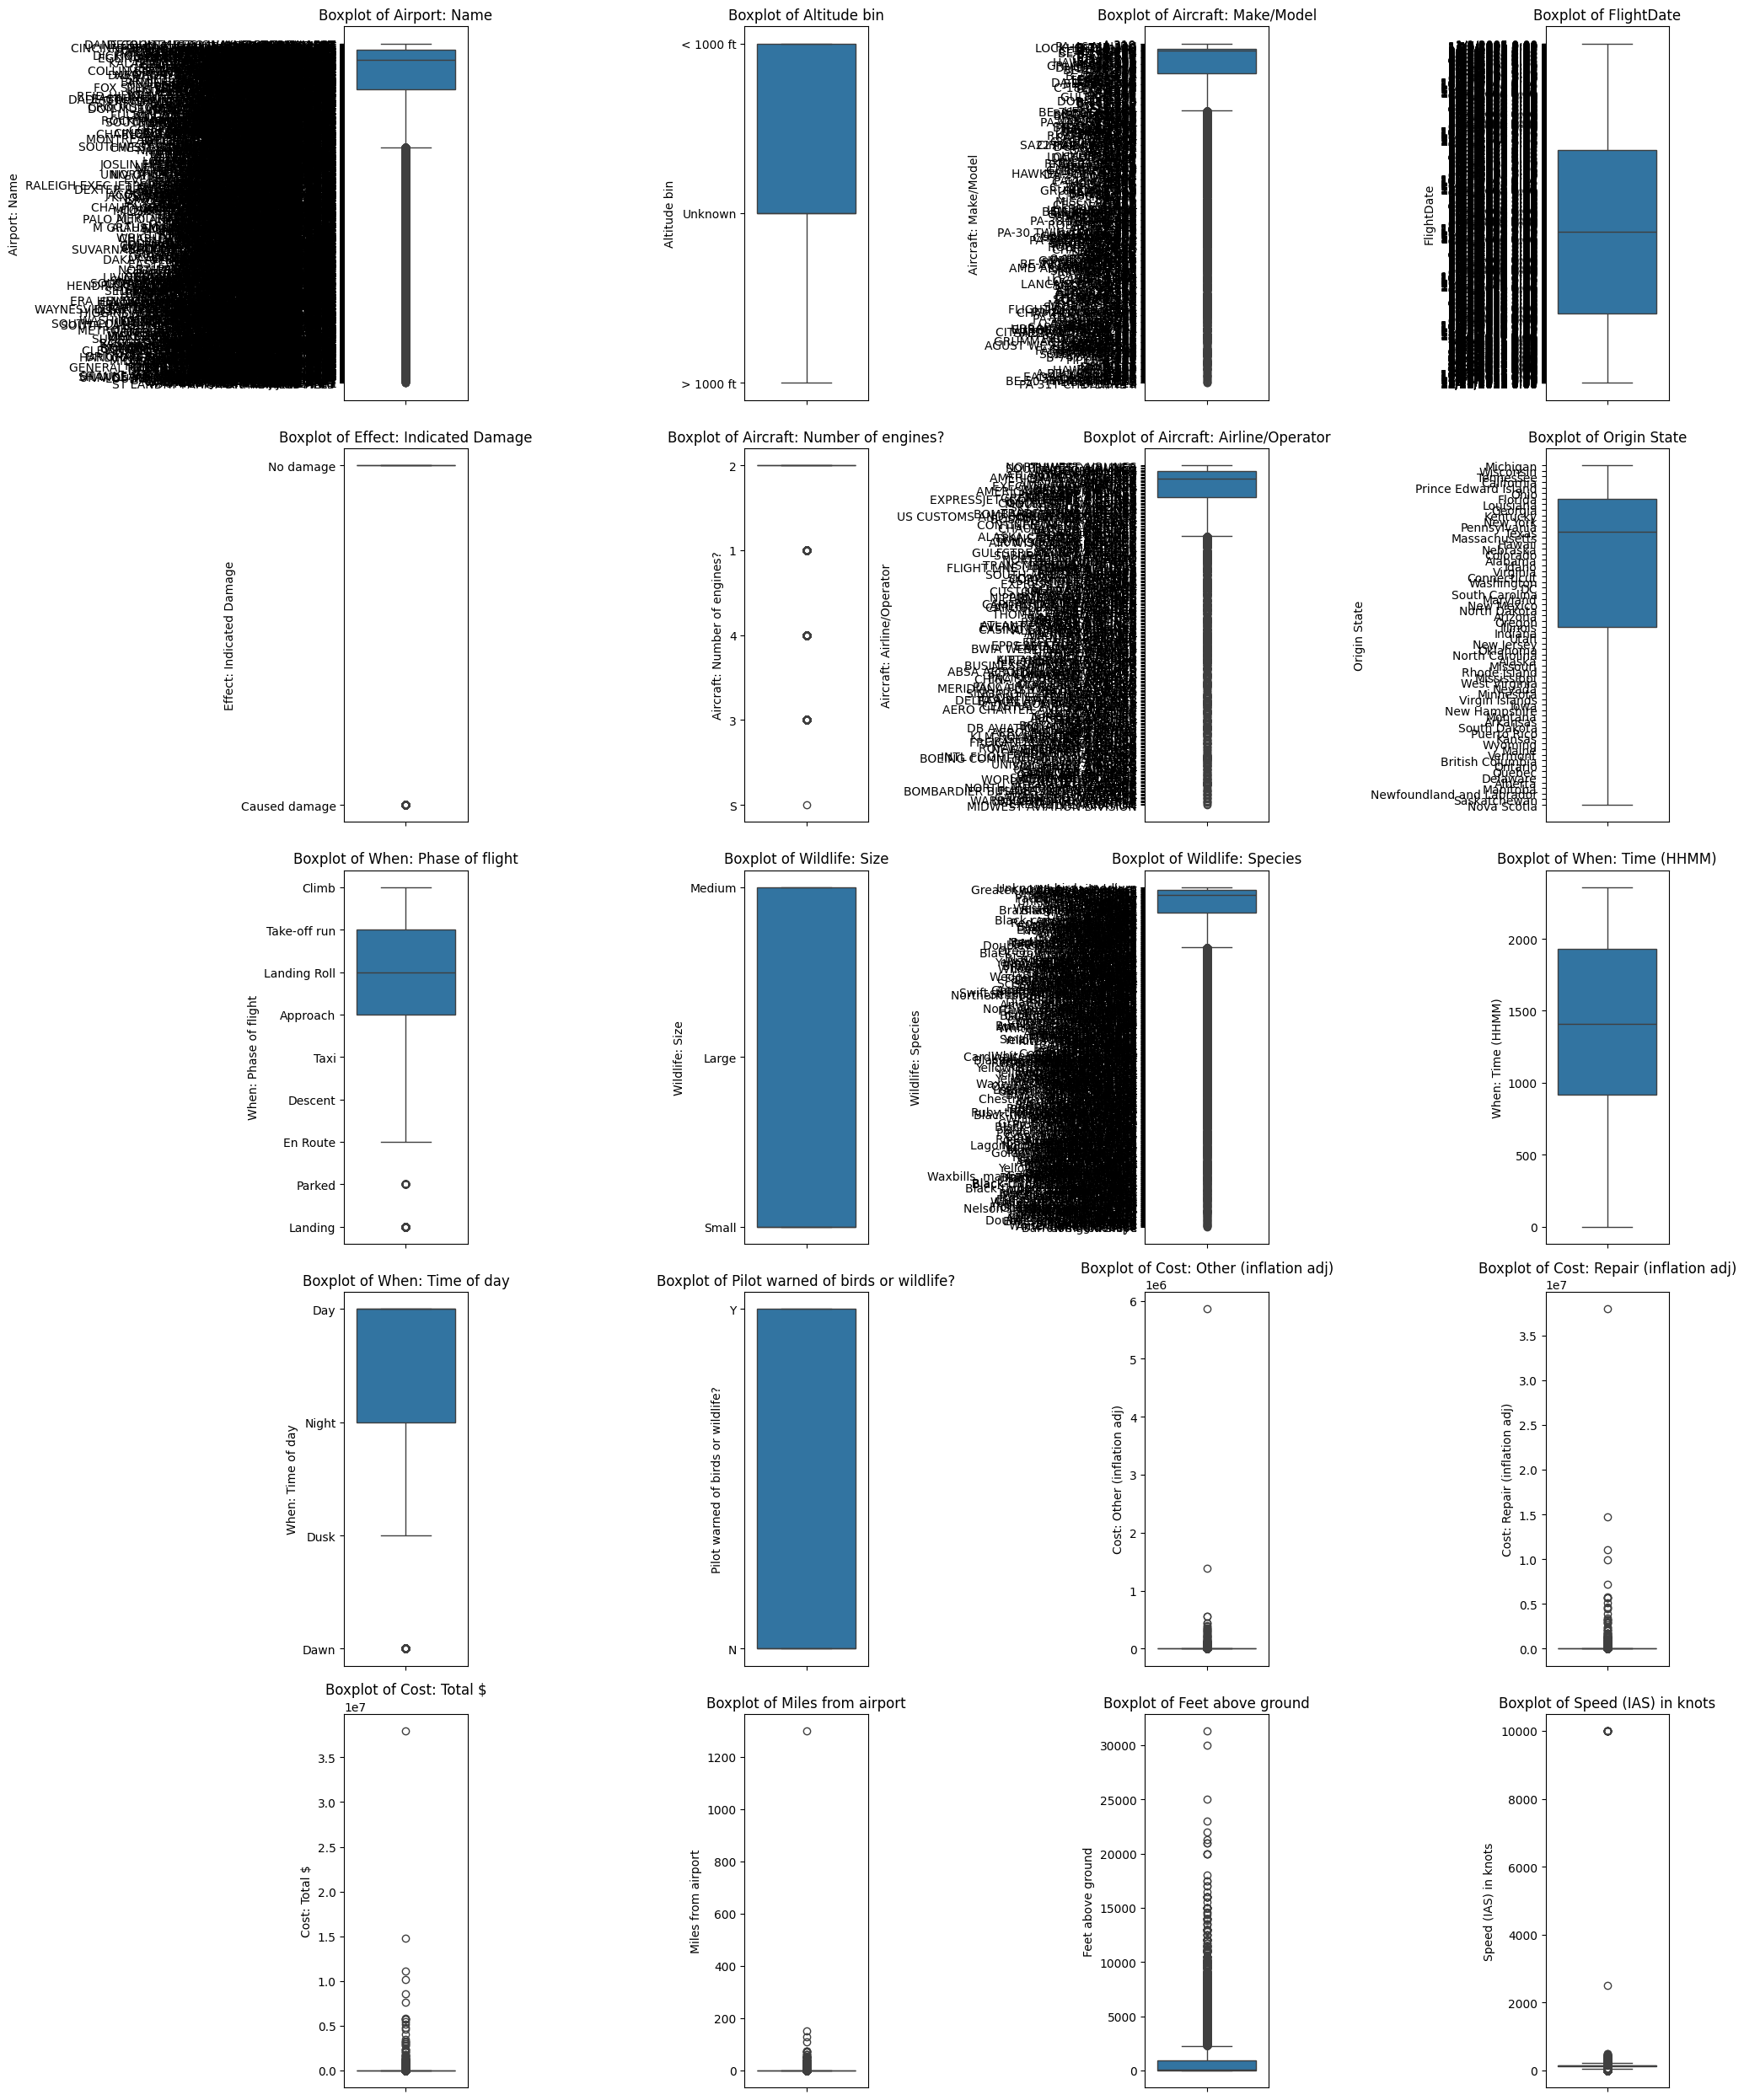

In [ ]:
#Boxplot for checking the Outliers.
plt.figure(figsize=(20, 40))

for i, column in enumerate(df.columns):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

From the Boxplot, it is visible that most of the features have outliers.Those outliers were removed from numerical columns using IQR(inter Quatile Range). The outliers were not removed from object columns because  categorical variables represent discrete categories or groups, so the concept of an outlier is less meaningful.



In [ ]:
#Remove outliers from Numerical columns using IQR
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        df1 = df.loc[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

#Display the cleaned dataframe
        print("Cleaned dataframe:")
        df1
df1.reset_index(drop=True,inplace=False)

Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:


,Airport: Name,Altitude bin,Aircraft: Make/Model,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,SACRAMENTO INTL,< 1000 ft,B-737-300,1/1/2005 0:00,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,2140.0,Night,Y,0,117135,117135,NaN,500.0,142.0
1,HENDERSON FIELD,< 1000 ft,LOCKHEED C-130,1/2/2005 0:00,Caused damage,4,GOVERNMENT,Prince Edward Island,Take-off run,Large,Laysan albatross,1340.0,Day,Y,0,0,0,0.0,0.0,100.0
2,ORLANDO INTL,< 1000 ft,B-757-200,1/2/2005 0:00,No damage,2,DELTA AIR LINES,Florida,Landing Roll,Medium,Ring-billed gull,NaN,Day,N,0,0,0,0.0,0.0,100.0
3,SACRAMENTO INTL,> 1000 ft,B-767-300,1/4/2005 0:00,No damage,2,HAWAIIAN AIR,California,Approach,NaN,Geese,NaN,Night,N,0,0,0,NaN,1500.0,180.0
4,PHILADELPHIA INTL,< 1000 ft,B-737-400,1/4/2005 0:00,No damage,2,US AIRWAYS*,Pennsylvania,Approach,NaN,Gulls,1729.0,Dusk,N,0,0,0,NaN,300.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,PALM BEACH INTL,< 1000 ft,GULFAERO IV,12/31/2011 0:00,No damage,2,BUSINESS,Florida,Approach,NaN,New World Vultures,1030.0,Day,Y,0,0,0,NaN,200.0,145.0
22836,SAN FRANCISCO INTL ARPT,< 1000 ft,B-777-200,12/31/2011 0:00,No damage,2,UNITED AIRLINES,California,Approach,NaN,Unknown bird,1904.0,Night,Y,0,0,0,4.0,1000.0,150.0
22837,CHARLOTTE/DOUGLAS INTL ARPT,< 1000 ft,A-319,12/31/2011 0:00,No damage,2,US AIRWAYS,North Carolina,Climb,Small,Rock pigeon,1025.0,Day,NaN,0,0,0,0.0,75.0,140.0
22838,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,12/31/2011 0:00,Caused damage,2,XTRA AIRWAYS,Illinois,Take-off run,Medium,Red-tailed hawk,1026.0,Day,N,0,0,0,0.0,0.0,165.0


In [ ]:
df1.shape

(22840, 20)

### **DATA VISUALIZATION AND PREPCOCESSING**






### When did the Strikes ocuur?


1.   Analysis for Year
2.   Analysis for Month
3.   Analysis for time of day






In [ ]:
df1['year']=pd.to_datetime(df1['FlightDate']).dt.year
df1['month']=pd.to_datetime(df1['FlightDate']).dt.month
df1['day']=pd.to_datetime(df1['FlightDate']).dt.day
df1.drop(['FlightDate'],axis=1,inplace=True)
df1

<ipython-input-15-8552d9c99de0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year']=pd.to_datetime(df1['FlightDate']).dt.year
<ipython-input-15-8552d9c99de0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month']=pd.to_datetime(df1['FlightDate']).dt.month
<ipython-input-15-8552d9c99de0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,...,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots,year,month,day
3,SACRAMENTO INTL,< 1000 ft,B-737-300,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,...,Y,0,117135,117135,NaN,500.0,142.0,2005,1,1
5,HENDERSON FIELD,< 1000 ft,LOCKHEED C-130,Caused damage,4,GOVERNMENT,Prince Edward Island,Take-off run,Large,Laysan albatross,...,Y,0,0,0,0.0,0.0,100.0,2005,1,2
9,ORLANDO INTL,< 1000 ft,B-757-200,No damage,2,DELTA AIR LINES,Florida,Landing Roll,Medium,Ring-billed gull,...,N,0,0,0,0.0,0.0,100.0,2005,1,2
19,SACRAMENTO INTL,> 1000 ft,B-767-300,No damage,2,HAWAIIAN AIR,California,Approach,NaN,Geese,...,N,0,0,0,NaN,1500.0,180.0,2005,1,4
20,PHILADELPHIA INTL,< 1000 ft,B-737-400,No damage,2,US AIRWAYS*,Pennsylvania,Approach,NaN,Gulls,...,N,0,0,0,NaN,300.0,135.0,2005,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64648,PALM BEACH INTL,< 1000 ft,GULFAERO IV,No damage,2,BUSINESS,Florida,Approach,NaN,New World Vultures,...,Y,0,0,0,NaN,200.0,145.0,2011,12,31
64650,SAN FRANCISCO INTL ARPT,< 1000 ft,B-777-200,No damage,2,UNITED AIRLINES,California,Approach,NaN,Unknown bird,...,Y,0,0,0,4.0,1000.0,150.0,2011,12,31
64656,CHARLOTTE/DOUGLAS INTL ARPT,< 1000 ft,A-319,No damage,2,US AIRWAYS,North Carolina,Climb,Small,Rock pigeon,...,NaN,0,0,0,0.0,75.0,140.0,2011,12,31
64658,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,Caused damage,2,XTRA AIRWAYS,Illinois,Take-off run,Medium,Red-tailed hawk,...,N,0,0,0,0.0,0.0,165.0,2011,12,31


In [ ]:
#Group by year and get the count of strikes
year_df1 = df1.groupby('year').size().reset_index(name='Count')

#Barchart using Plotly Express
bar_year = px.bar(year_df1, x='year', y='Count', labels={'year': 'Year', 'Count': 'Number of strikes'}, color_discrete_sequence=['#1f77b4'])
bar_trace = bar_year['data'][0]

#Linechart using Plotly Express
line_year = px.line(year_df1, x='year', y='Count',  labels={'year': 'Year', 'Count': 'Number of Strikes'}, color_discrete_sequence=['#1f77b4'])
line_trace = line_year['data'][0]

#Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=['Incidents Count by Year', 'Incidents Count Over Years'])

# Add bar trace to subplot 1
fig.add_trace(bar_trace, row=1, col=1)

# Add line trace to subplot 2
fig.add_trace(line_trace, row=2, col=1)

# Update layout
fig.update_layout(height=800, showlegend=False, template='plotly')

# Show the figure
fig.show()

### Output Evaluation
      
The number of reported strikes has steadily increased over time.

2.Analysis for Month

In [ ]:
# Group by Month and get the count of Strikes
month_df1 = df1.groupby('month').size().reset_index(name='Count')

#Bar chart using Plotly Express
bar_month = px.bar(month_df1, x='month', y='Count', labels={'month': 'Month', 'Count': 'Number of Strikes'}, color_discrete_sequence=['#09748f'])
bar_trace = bar_month['data'][0]

#Line chart using Plotly Express
line_month = px.line(month_df1, x='month', y='Count', labels={'month': 'Month', 'Count': 'Number of Strikes'}, color_discrete_sequence=['#09748f'])
line_trace = line_month['data'][0]

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=['Incidents Count by Month', 'Incidents Count Over Months'])

# Add bar trace to subplot 1
fig.add_trace(bar_trace, row=1, col=1)

# Add line trace to subplot 2
fig.add_trace(line_trace, row=2, col=1)

# Update layout
fig.update_layout(height=800, showlegend=False, template='plotly')

# Show the figure
fig.show()

### Output Evaluation

Seasonal Variation in Accident Frequency: Accidents surge from spring, peak in August and September, and then taper off as winter approaches.

3.Analysis for time of Day

In [ ]:
day_count=df1['When: Time of day'].value_counts()
day_count

When: Time of day
Day      13609
Night     7021
Dusk      1034
Dawn       666
Name: count, dtype: int64

In [ ]:
#PieChart
pie_chart = px.pie(day_count,
                  values=day_count.values,
                  names=day_count.index,
                  color=day_count.index,
                  title='Distribution of Strikes Across Different Times of the Day',
                  color_discrete_map={'Day':'#09748f',
                                 'Dawn':'#1859a3',
                                 'Night':'#032142',
                                 'Dusk':'#ad611a'},
                       labels={'values': 'Frequency', 'names': 'Time of Day'},
                       hole=.4,)
# Adding text labels
pie_chart.update_traces(textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])

# Customizing layout
pie_chart.update_layout(font=dict(size=14, color="black"), height=500,template='plotly',)
# Show the pie chart
pie_chart.show()


### Output Evaluation

Incidents are approximately twice as frequent during the day as they are at night.

### Which Bird Species cause most damage to Airplanes

In [ ]:
#Top 30 species count
species_count = df1['Wildlife: Species'].value_counts().head(30)

# Create Treemap
fig_treemap = px.treemap(names=species_count.index, parents=['Top 20 Species'] * len(species_count),
                         values=species_count.values,
                         title='Top 30 Species Involved in Incidents',
                         color=species_count.values,
                         color_continuous_scale='Cividis',)
# Customizing layout
fig_treemap.update_layout(
    font=dict(size=14, color="white"),
    coloraxis_colorbar=dict(title='Frequency'),
    height=800,
    template='plotly_dark',)

fig_treemap.show()

### Output Evaluation

Unknown small birds are predominantly implicated in strikes among 30 species.

### Which type of Aircraft is most Impacted.

In [ ]:
#Count of Top 20 aircraft based on frequency
aircraft_count = df1['Aircraft: Make/Model'].value_counts().head(20).sort_values(ascending=False)
# Create Bar Chart
aircraft_bar = px.bar(aircraft_count, y=aircraft_count.index, x=aircraft_count.values,
                                 title='Top 20 Aircrafts Most Impacted',
                                 orientation='h',
                                 text=aircraft_count.values,
                                 color=aircraft_count.values,
                                 color_continuous_scale='YlOrRd',
                                 labels={'index': 'Aircraft', 'values': 'Frequency'})
#Layout
aircraft_bar.update_layout(font=dict(size=14, color="white"),
                           coloraxis_colorbar=dict(title='Frequency'),
                           height=600,
                           template='plotly_dark')
aircraft_bar.show()


### Output Evaluation.

B-737-700 are prone to being affected.

### Which Operators mostly Affected.


In [ ]:
# Get the top 20 operators based on frequency
operators_count=df1['Aircraft: Airline/Operator'].value_counts().head(20).sort_values(ascending=True)
# Create Bar Chart
operators_bar= px.bar(operators_count, y=operators_count.index, x=operators_count.values,
                         title='Top 20 Operators Involved in Bird strikes',
                         orientation='h',
                         color=operators_count.values,
                         color_continuous_scale='Jet',
                         labels={'index': 'Operators', 'values': 'Frequency'})
#Layout
operators_bar.update_layout(font=dict(size=14, color="white"),
                            coloraxis_colorbar=dict(title='Frequency'),
                            height=600,
                            template='plotly_dark')
operators_bar.show()

### Output Evaluation

Southwest Airlines operators dominate the list of strikes among the top 20 operators, with Business-operated aircraft ranking second highest.

### Which Airport exxperience the highest  number of bird strikes.

In [ ]:
#Top 20 airports based on frequency in descending order
airports_count = df1['Airport: Name'].value_counts().head(20).sort_values(ascending=True)

# Create the horizontal bar chart
airports_bar=px.bar(airports_count, y=airports_count.index, x=airports_count.values,
                          title='Top 20 Airports Most Impacted',
                          orientation='h',
                          text=airports_count.values,
                          color=airports_count.values,
                          color_continuous_scale='Jet',
                          labels={'index': 'Airport', 'values': 'Frequency'})
#Layout
airports_bar.update_layout(font=dict(size=14, color="white"),
                           coloraxis_colorbar=dict(title='Frequency'),
                           height=600,
                           template='plotly_dark')
airports_bar.show()


### Which Phase of Flight is most impacted by bird strike.

In [ ]:
# Get the count of phases of flight
flightphase_count=df1['When: Phase of flight'].value_counts().sort_values(ascending=True)


# Create Bar Chart
flightphase_bar=px.bar(flightphase_count, y=flightphase_count.index, x=flightphase_count.values,
                                   title='Phases of Flight Most Impacted',
                                   orientation='h',
                                   text=flightphase_count.values,
                                   color=flightphase_count.values,
                                   color_continuous_scale='Blues',
                                   labels={'index': 'Phase of Flight', 'values': 'Frequency'})
#Layout
flightphase_bar.update_layout(font=dict(size=14, color="white"),
                               coloraxis_colorbar=dict(title='Frequency'),
                               height=600,
                               template='plotly_dark')

flightphase_bar.show()

### Output Evaluation

Aircraft during the approach phase are more susceptible to wildlife strikes.

### How Bird strike affected Engines.

In [ ]:
#Get the count of Engines
engine_count=df1['Aircraft: Number of engines?'].value_counts()
engine_count

Aircraft: Number of engines?
2    17854
1     1235
3      975
4      310
Name: count, dtype: int64

In [ ]:
funnel_chart=px.funnel(engine_count,y=engine_count.index, x=engine_count.values,
                       title='All Strikes over Aircraft Number of Engines',
                       labels={'index':'Aircraft Number of Engines'})

funnel_chart.show()

### How Damaging Strikes affected Aircraft Number of Engines.

In [ ]:
bird_dmg = df1.loc[(df1['Effect: Indicated Damage'] != 'No damage') |
                    (df1['Cost: Total $'] > 0) ]
bird_dmg

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,...,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots,year,month,day
3,SACRAMENTO INTL,< 1000 ft,B-737-300,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,...,Y,0,117135,117135,NaN,500.0,142.0,2005,1,1
5,HENDERSON FIELD,< 1000 ft,LOCKHEED C-130,Caused damage,4,GOVERNMENT,Prince Edward Island,Take-off run,Large,Laysan albatross,...,Y,0,0,0,0.0,0.0,100.0,2005,1,2
24,TAMPA INTL,> 1000 ft,B-757-200,Caused damage,2,NORTHWEST AIRLINES,Florida,Approach,Large,Unknown bird - large,...,Y,0,0,0,NaN,1850.0,180.0,2005,1,4
26,NEW ORLEANS INTL,< 1000 ft,MD-88,Caused damage,2,DELTA AIR LINES,Louisiana,Approach,NaN,Gulls,...,N,0,0,0,NaN,200.0,135.0,2005,1,4
48,BOWERMAN ARPT,< 1000 ft,HAWKER 1000,Caused damage,2,BUSINESS,Washington,Climb,Small,Dunlin,...,N,5857,234270,240127,NaN,10.0,130.0,2005,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64621,UNKNOWN,> 1000 ft,BE-58 BARON,Caused damage,2,PRIVATELY OWNED,Missouri,En Route,Medium,Unknown bird - medium,...,N,0,19000,19000,NaN,2200.0,170.0,2011,12,28
64622,ST LANDRY PARISH ARPT-AHART FIELD,> 1000 ft,BELL-407,Caused damage,1,PHI INC,Louisiana,NaN,Medium,Unknown bird - medium,...,N,0,0,0,NaN,5500.0,70.0,2011,12,28
64623,FORT LAUDERDALE/HOLLYWOOD INTL,< 1000 ft,B-757-200,Caused damage,2,DELTA AIR LINES,Florida,Climb,Large,Turkey vulture,...,Y,0,0,0,1.0,800.0,180.0,2011,12,28
64658,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,Caused damage,2,XTRA AIRWAYS,Illinois,Take-off run,Medium,Red-tailed hawk,...,N,0,0,0,0.0,0.0,165.0,2011,12,31


In [ ]:
engine_count=bird_dmg['Aircraft: Number of engines?'].value_counts()
engine_count

Aircraft: Number of engines?
2    1838
1     461
3      55
4      43
Name: count, dtype: int64

In [ ]:
funnel_chart_area=px.funnel_area(engine_count,engine_count.index,engine_count.values,
                                 title='Damaging Strikes over Aircraft Number of Engines')
funnel_chart_area.show()

### Output Evaluation.

The first Funnel chart indicates that bird strikes most frequently occur on airplanes with two engines.

The second Funnel chart, focusing only on damaging strikes rather than all strikes, illustrates that airplanes with two engines are still the most frequently struck. However, among all aircraft struck by birds, one-engine aircraft are disproportionately damaged. This is logical, as one-engine aircraft are more susceptible to damage once struck due to their lack of a backup engine.

### Wildlife Size Impact on Aircraft Strikes.

In [ ]:
Wildlife_size_count=df1['Wildlife: Size'].value_counts()
Wildlife_size_count

Wildlife: Size
Small     12601
Medium     6179
Large      1383
Name: count, dtype: int64

In [ ]:
fig = px.violin(df1, y="Wildlife: Size",points='all')
fig.show()

### Did the pilot warn of birds or wildlife?

In [ ]:
warn_count=df1['Pilot warned of birds or wildlife?'].value_counts()
warn_count

Pilot warned of birds or wildlife?
N    10219
Y     6859
Name: count, dtype: int64

In [ ]:
#sns.countplot(x='Pilot warned of birds or wildlife?',data=df)
fig = px.histogram(df1, x="Pilot warned of birds or wildlife?")

# showing the plot
fig.show()

### Aircraft Damage Outcome: 'Caused damage' or 'Caused no damage'.

In [ ]:
damage_count=df1['Effect: Indicated Damage'].value_counts()
damage_count

Effect: Indicated Damage
No damage        20719
Caused damage     2121
Name: count, dtype: int64

In [ ]:
damage = px.histogram(df1,x='Effect: Indicated Damage')
damage.show()

Output Evaluation: The histogram diseplays most of the strikes caused no damage to the aircraft. Also this is a sign of imbalances in the dataset.

## **Data Preprocessing.**


1.   Data Cleaning.
2.   Feature Selection.
3.   Handling Imbalanced Data.
4.   Splitting the Dataset.
5.   Normalization










In [ ]:
#Dropping unwanted columns for predictive analysis.

df1.drop(['Airport: Name','Altitude bin','Aircraft: Airline/Operator','Origin State','Wildlife: Species'],axis=1,inplace=True)
df1 = df1.reset_index(drop=True)
df1


<ipython-input-36-4e059ddeaedd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Aircraft: Make/Model,Effect: Indicated Damage,Aircraft: Number of engines?,When: Phase of flight,Wildlife: Size,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots,year,month,day
0,B-737-300,Caused damage,2,Approach,Large,2140.0,Night,Y,0,117135,117135,NaN,500.0,142.0,2005,1,1
1,LOCKHEED C-130,Caused damage,4,Take-off run,Large,1340.0,Day,Y,0,0,0,0.0,0.0,100.0,2005,1,2
2,B-757-200,No damage,2,Landing Roll,Medium,NaN,Day,N,0,0,0,0.0,0.0,100.0,2005,1,2
3,B-767-300,No damage,2,Approach,NaN,NaN,Night,N,0,0,0,NaN,1500.0,180.0,2005,1,4
4,B-737-400,No damage,2,Approach,NaN,1729.0,Dusk,N,0,0,0,NaN,300.0,135.0,2005,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,GULFAERO IV,No damage,2,Approach,NaN,1030.0,Day,Y,0,0,0,NaN,200.0,145.0,2011,12,31
22836,B-777-200,No damage,2,Approach,NaN,1904.0,Night,Y,0,0,0,4.0,1000.0,150.0,2011,12,31
22837,A-319,No damage,2,Climb,Small,1025.0,Day,NaN,0,0,0,0.0,75.0,140.0,2011,12,31
22838,B-737-400,Caused damage,2,Take-off run,Medium,1026.0,Day,N,0,0,0,0.0,0.0,165.0,2011,12,31


In [ ]:
aircraft_count = df1['Aircraft: Make/Model'].value_counts()
aircraft_count

Aircraft: Make/Model
B-737-700             2426
B-737-300             1773
CL-RJ100/200          1449
A-320                 1082
UNKNOWN               1020
                      ... 
CAP AVION MUDRY          1
E-3B                     1
F-16A                    1
U-2S                     1
PA-31T CHEYENNE II       1
Name: count, Length: 383, dtype: int64

### ENCODING CATEGORICAL VARIABLES..

Method1: Get Dummies.

Method2: Label Encoding.

In [ ]:
#Method 1: Get dummies

# Method 1: Get dummies
df2 = pd.get_dummies(df1[['Aircraft: Make/Model','When: Phase of flight','Wildlife: Size','When: Time of day','Pilot warned of birds or wildlife?']], drop_first=True)
df2 = df2.reset_index(drop=True)
# Replace True/False with 1/0
df2 = df2.astype(int)
df2



,Aircraft: Make/Model_A-23 MUSKATEER,Aircraft: Make/Model_A-300,Aircraft: Make/Model_A-310,Aircraft: Make/Model_A-318,Aircraft: Make/Model_A-319,Aircraft: Make/Model_A-320,Aircraft: Make/Model_A-321,Aircraft: Make/Model_A-330,Aircraft: Make/Model_A-340,Aircraft: Make/Model_AA-1,...,When: Phase of flight_Landing Roll,When: Phase of flight_Parked,When: Phase of flight_Take-off run,When: Phase of flight_Taxi,Wildlife: Size_Medium,Wildlife: Size_Small,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,Pilot warned of birds or wildlife?_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
22836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
22837,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
22838,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
#Concatenate the encoded dataframe with main dataframe.

df3=pd.concat([df1,df2],axis=1)
df3

,Aircraft: Make/Model,Effect: Indicated Damage,Aircraft: Number of engines?,When: Phase of flight,Wildlife: Size,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Other (inflation adj),Cost: Repair (inflation adj),...,When: Phase of flight_Landing Roll,When: Phase of flight_Parked,When: Phase of flight_Take-off run,When: Phase of flight_Taxi,Wildlife: Size_Medium,Wildlife: Size_Small,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,Pilot warned of birds or wildlife?_Y
0,B-737-300,Caused damage,2,Approach,Large,2140.0,Night,Y,0,117135,...,0,0,0,0,0,0,0,0,1,1
1,LOCKHEED C-130,Caused damage,4,Take-off run,Large,1340.0,Day,Y,0,0,...,0,0,1,0,0,0,1,0,0,1
2,B-757-200,No damage,2,Landing Roll,Medium,NaN,Day,N,0,0,...,1,0,0,0,1,0,1,0,0,0
3,B-767-300,No damage,2,Approach,NaN,NaN,Night,N,0,0,...,0,0,0,0,0,0,0,0,1,0
4,B-737-400,No damage,2,Approach,NaN,1729.0,Dusk,N,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,GULFAERO IV,No damage,2,Approach,NaN,1030.0,Day,Y,0,0,...,0,0,0,0,0,0,1,0,0,1
22836,B-777-200,No damage,2,Approach,NaN,1904.0,Night,Y,0,0,...,0,0,0,0,0,0,0,0,1,1
22837,A-319,No damage,2,Climb,Small,1025.0,Day,NaN,0,0,...,0,0,0,0,0,1,1,0,0,0
22838,B-737-400,Caused damage,2,Take-off run,Medium,1026.0,Day,N,0,0,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
#Drop the columns from the new dataframe that are to be encoded.

df3.drop(['When: Phase of flight','Wildlife: Size','When: Time of day','Pilot warned of birds or wildlife?','Aircraft: Make/Model'],axis=1,inplace=True)
df3

,Effect: Indicated Damage,Aircraft: Number of engines?,When: Time (HHMM),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots,year,...,When: Phase of flight_Landing Roll,When: Phase of flight_Parked,When: Phase of flight_Take-off run,When: Phase of flight_Taxi,Wildlife: Size_Medium,Wildlife: Size_Small,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,Pilot warned of birds or wildlife?_Y
0,Caused damage,2,2140.0,0,117135,117135,NaN,500.0,142.0,2005,...,0,0,0,0,0,0,0,0,1,1
1,Caused damage,4,1340.0,0,0,0,0.0,0.0,100.0,2005,...,0,0,1,0,0,0,1,0,0,1
2,No damage,2,NaN,0,0,0,0.0,0.0,100.0,2005,...,1,0,0,0,1,0,1,0,0,0
3,No damage,2,NaN,0,0,0,NaN,1500.0,180.0,2005,...,0,0,0,0,0,0,0,0,1,0
4,No damage,2,1729.0,0,0,0,NaN,300.0,135.0,2005,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,No damage,2,1030.0,0,0,0,NaN,200.0,145.0,2011,...,0,0,0,0,0,0,1,0,0,1
22836,No damage,2,1904.0,0,0,0,4.0,1000.0,150.0,2011,...,0,0,0,0,0,0,0,0,1,1
22837,No damage,2,1025.0,0,0,0,0.0,75.0,140.0,2011,...,0,0,0,0,0,1,1,0,0,0
22838,Caused damage,2,1026.0,0,0,0,0.0,0.0,165.0,2011,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
#Encoding
#Method 2: Label Encoding
label=LabelEncoder()
df3['Effect: Indicated Damage']=label.fit_transform(df3['Effect: Indicated Damage'])
df3

,Effect: Indicated Damage,Aircraft: Number of engines?,When: Time (HHMM),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots,year,...,When: Phase of flight_Landing Roll,When: Phase of flight_Parked,When: Phase of flight_Take-off run,When: Phase of flight_Taxi,Wildlife: Size_Medium,Wildlife: Size_Small,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,Pilot warned of birds or wildlife?_Y
0,0,2,2140.0,0,117135,117135,NaN,500.0,142.0,2005,...,0,0,0,0,0,0,0,0,1,1
1,0,4,1340.0,0,0,0,0.0,0.0,100.0,2005,...,0,0,1,0,0,0,1,0,0,1
2,1,2,NaN,0,0,0,0.0,0.0,100.0,2005,...,1,0,0,0,1,0,1,0,0,0
3,1,2,NaN,0,0,0,NaN,1500.0,180.0,2005,...,0,0,0,0,0,0,0,0,1,0
4,1,2,1729.0,0,0,0,NaN,300.0,135.0,2005,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,1,2,1030.0,0,0,0,NaN,200.0,145.0,2011,...,0,0,0,0,0,0,1,0,0,1
22836,1,2,1904.0,0,0,0,4.0,1000.0,150.0,2011,...,0,0,0,0,0,0,0,0,1,1
22837,1,2,1025.0,0,0,0,0.0,75.0,140.0,2011,...,0,0,0,0,0,1,1,0,0,0
22838,0,2,1026.0,0,0,0,0.0,0.0,165.0,2011,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
#Filling missing values

df3['Aircraft: Number of engines?']=df3['Aircraft: Number of engines?'].fillna(df3['Aircraft: Number of engines?'].mode()[0])
df3['When: Time (HHMM)']=df3['When: Time (HHMM)'].fillna(df3['When: Time (HHMM)'].mode()[0])
df3['Miles from airport']=df3['Miles from airport'].fillna(df3['Miles from airport'].median())
df3['Feet above ground']=df3['Feet above ground'].fillna(df3['Feet above ground'].mean())
df3['Speed (IAS) in knots']=df3['Speed (IAS) in knots'].fillna(df3['Speed (IAS) in knots'].median())
df3.isna().sum()

Effect: Indicated Damage                0
Aircraft: Number of engines?            0
When: Time (HHMM)                       0
Cost: Other (inflation adj)             0
Cost: Repair (inflation adj)            0
                                       ..
Wildlife: Size_Small                    0
When: Time of day_Day                   0
When: Time of day_Dusk                  0
When: Time of day_Night                 0
Pilot warned of birds or wildlife?_Y    0
Length: 408, dtype: int64

In [ ]:
#Let's Check the Datatypes.

df3.dtypes

Effect: Indicated Damage                  int64
Aircraft: Number of engines?             object
When: Time (HHMM)                       float64
Cost: Other (inflation adj)               int64
Cost: Repair (inflation adj)              int64
                                         ...   
Wildlife: Size_Small                      int64
When: Time of day_Day                     int64
When: Time of day_Dusk                    int64
When: Time of day_Night                   int64
Pilot warned of birds or wildlife?_Y      int64
Length: 408, dtype: object

In [ ]:
#Changing the datatype.

df3['Aircraft: Number of engines?']=df3['Aircraft: Number of engines?'].astype('int64')
df3.dtypes

Effect: Indicated Damage                  int64
Aircraft: Number of engines?              int64
When: Time (HHMM)                       float64
Cost: Other (inflation adj)               int64
Cost: Repair (inflation adj)              int64
                                         ...   
Wildlife: Size_Small                      int64
When: Time of day_Day                     int64
When: Time of day_Dusk                    int64
When: Time of day_Night                   int64
Pilot warned of birds or wildlife?_Y      int64
Length: 408, dtype: object

### FEATURE SELECTION.

In [ ]:
corr=df3.corr()
corr

,Effect: Indicated Damage,Aircraft: Number of engines?,When: Time (HHMM),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots,year,...,When: Phase of flight_Landing Roll,When: Phase of flight_Parked,When: Phase of flight_Take-off run,When: Phase of flight_Taxi,Wildlife: Size_Medium,Wildlife: Size_Small,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,Pilot warned of birds or wildlife?_Y
Effect: Indicated Damage,1.000000,0.136515,-0.011837,-0.050892,-0.072280,-0.078085,-0.023358,-0.070701,0.038647,0.022351,...,0.055907,-0.009496,0.019560,0.002117,-0.039457,0.224514,-0.012364,0.000015,0.012421,0.011831
Aircraft: Number of engines?,0.136515,1.000000,-0.043873,-0.000228,0.001241,0.001186,0.029766,0.024872,0.261154,-0.055777,...,0.027901,-0.000465,0.035250,-0.000269,0.100658,-0.037773,-0.086272,-0.027277,0.094400,-0.035691
When: Time (HHMM),-0.011837,-0.043873,1.000000,0.002749,-0.000501,-0.000107,0.058175,0.141069,0.089340,0.048628,...,-0.020869,-0.007713,-0.089108,-0.003836,0.065452,-0.061206,-0.266152,0.136758,0.312327,-0.006203
Cost: Other (inflation adj),-0.050892,-0.000228,0.002749,1.000000,0.060858,0.199898,0.000635,-0.000320,-0.003224,-0.010029,...,-0.001215,-0.000200,-0.003611,-0.000115,-0.002789,-0.015030,0.004098,0.000945,-0.003384,-0.006937
Cost: Repair (inflation adj),-0.072280,0.001241,-0.000501,0.060858,1.000000,0.990166,-0.001954,0.005378,0.004699,-0.004762,...,-0.004702,-0.000025,0.006996,-0.000156,-0.002010,-0.017801,0.003786,0.002904,-0.003348,-0.006255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wildlife: Size_Small,0.224514,-0.037773,-0.061206,-0.015030,-0.017801,-0.019581,-0.040273,-0.129171,-0.102490,0.120783,...,0.077220,0.002649,0.046492,0.005965,-0.675589,1.000000,0.124113,0.003191,-0.126030,0.095614
When: Time of day_Day,-0.012364,-0.086272,-0.266152,0.004098,0.003786,0.004291,-0.156702,-0.316087,-0.254856,0.051369,...,0.126505,0.001654,0.148616,0.005450,-0.175072,0.124113,1.000000,-0.264400,-0.808907,0.136661
When: Time of day_Dusk,0.000015,-0.027277,0.136758,0.000945,0.002904,0.002983,-0.028678,-0.053010,-0.038472,-0.043473,...,0.033156,-0.002496,-0.002997,-0.001441,0.000127,0.003191,-0.264400,1.000000,-0.145072,0.013086
When: Time of day_Night,0.012421,0.094400,0.312327,-0.003384,-0.003348,-0.003760,0.191275,0.370470,0.289626,0.002528,...,-0.142752,-0.007636,-0.182831,-0.004408,0.180187,-0.126030,-0.808907,-0.145072,1.000000,-0.136508


In [ ]:
#Check for multicollinearity and remove the highly correlated features

cor_matrix=df3.corr().abs()
mask=np.triu(np.ones_like(cor_matrix, dtype=bool))
triangular_df=cor_matrix.mask(mask)
feature_drop=[x for x in triangular_df.columns if any(triangular_df[x]>0.95)]
feature_drop

['Cost: Repair (inflation adj)']

In [ ]:
df3 = df3.drop(feature_drop, axis=1)
df3.reset_index(drop=True, inplace=True)
df3

,Effect: Indicated Damage,Aircraft: Number of engines?,When: Time (HHMM),Cost: Other (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots,year,month,...,When: Phase of flight_Landing Roll,When: Phase of flight_Parked,When: Phase of flight_Take-off run,When: Phase of flight_Taxi,Wildlife: Size_Medium,Wildlife: Size_Small,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,Pilot warned of birds or wildlife?_Y
0,0,2,2140.0,0,117135,0.0,500.0,142.0,2005,1,...,0,0,0,0,0,0,0,0,1,1
1,0,4,1340.0,0,0,0.0,0.0,100.0,2005,1,...,0,0,1,0,0,0,1,0,0,1
2,1,2,1000.0,0,0,0.0,0.0,100.0,2005,1,...,1,0,0,0,1,0,1,0,0,0
3,1,2,1000.0,0,0,0.0,1500.0,180.0,2005,1,...,0,0,0,0,0,0,0,0,1,0
4,1,2,1729.0,0,0,0.0,300.0,135.0,2005,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,1,2,1030.0,0,0,0.0,200.0,145.0,2011,12,...,0,0,0,0,0,0,1,0,0,1
22836,1,2,1904.0,0,0,4.0,1000.0,150.0,2011,12,...,0,0,0,0,0,0,0,0,1,1
22837,1,2,1025.0,0,0,0.0,75.0,140.0,2011,12,...,0,0,0,0,0,1,1,0,0,0
22838,0,2,1026.0,0,0,0.0,0.0,165.0,2011,12,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
#Splitting the dataset for chi square test.

x1=df3.iloc[:,1:409]
x1

,Aircraft: Number of engines?,When: Time (HHMM),Cost: Other (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots,year,month,day,...,When: Phase of flight_Landing Roll,When: Phase of flight_Parked,When: Phase of flight_Take-off run,When: Phase of flight_Taxi,Wildlife: Size_Medium,Wildlife: Size_Small,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,Pilot warned of birds or wildlife?_Y
0,2,2140.0,0,117135,0.0,500.0,142.0,2005,1,1,...,0,0,0,0,0,0,0,0,1,1
1,4,1340.0,0,0,0.0,0.0,100.0,2005,1,2,...,0,0,1,0,0,0,1,0,0,1
2,2,1000.0,0,0,0.0,0.0,100.0,2005,1,2,...,1,0,0,0,1,0,1,0,0,0
3,2,1000.0,0,0,0.0,1500.0,180.0,2005,1,4,...,0,0,0,0,0,0,0,0,1,0
4,2,1729.0,0,0,0.0,300.0,135.0,2005,1,4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,2,1030.0,0,0,0.0,200.0,145.0,2011,12,31,...,0,0,0,0,0,0,1,0,0,1
22836,2,1904.0,0,0,4.0,1000.0,150.0,2011,12,31,...,0,0,0,0,0,0,0,0,1,1
22837,2,1025.0,0,0,0.0,75.0,140.0,2011,12,31,...,0,0,0,0,0,1,1,0,0,0
22838,2,1026.0,0,0,0.0,0.0,165.0,2011,12,31,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
y1=df3.iloc[:,0]
y1

0        0
1        0
2        1
3        1
4        1
        ..
22835    1
22836    1
22837    1
22838    0
22839    0
Name: Effect: Indicated Damage, Length: 22840, dtype: int64

Feature Selection using Chi Square Test.

The chi-square test evaluates the independence between the feature and the target variable in a categorical dataset.

In [ ]:
#Apply selectkbest alg
features=SelectKBest(score_func=chi2,k=406)
features1=features.fit(x1,y1)
dfscores=pd.DataFrame(features1.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(x1.columns)

In [ ]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank

,0,Score
0,Aircraft: Number of engines?,3.184396e+01
1,When: Time (HHMM),7.872297e+02
2,Cost: Other (inflation adj),1.350885e+08
3,Cost: Total $,1.548451e+09
4,Miles from airport,1.346823e+02
...,...,...
401,Wildlife: Size_Small,5.161104e+02
402,When: Time of day_Day,1.411186e+00
403,When: Time of day_Dusk,4.944549e-06
404,When: Time of day_Night,2.440686e+00


In [ ]:
#Features having largest score
top_features=features_rank.nlargest(15,'Score')
top_features

,0,Score
3,Cost: Total $,1.548451e+09
2,Cost: Other (inflation adj),1.350885e+08
5,Feet above ground,2.418546e+05
1,When: Time (HHMM),7.872297e+02
401,Wildlife: Size_Small,5.161104e+02
6,Speed (IAS) in knots,2.741709e+02
394,When: Phase of flight_En Route,1.893682e+02
117,Aircraft: Make/Model_C-172,1.618618e+02
121,Aircraft: Make/Model_C-182 SKYLAN,1.484387e+02
4,Miles from airport,1.346823e+02


In [ ]:
#Features having lowest scores.
low_features=features_rank.nsmallest(14,'Score')
low_features

,0,Score
403,When: Time of day_Dusk,0.000005
43,Aircraft: Make/Model_B-727-100,0.006046
301,Aircraft: Make/Model_MBB BK117,0.008645
180,Aircraft: Make/Model_DA-20 FALCON,0.012092
61,Aircraft: Make/Model_B-757-300,0.018138
170,Aircraft: Make/Model_CL-601/604,0.018138
7,year,0.021419
231,Aircraft: Make/Model_EXPERIMENTAL,0.035575
371,Aircraft: Make/Model_SIKORSKY S-92,0.035575
25,Aircraft: Make/Model_AEROS SA365,0.071150


 Features with the lowest score are typically removed because they are considered to be the least informative or least relevant for the prediction task.

In [ ]:
# Features with lowest score is removed.

df4 = df3.drop(df3.columns[low_features.index.values], axis=1)
df4


,Effect: Indicated Damage,Aircraft: Number of engines?,When: Time (HHMM),Cost: Other (inflation adj),Cost: Total $,Miles from airport,Feet above ground,year,month,day,...,When: Phase of flight_Landing,When: Phase of flight_Landing Roll,When: Phase of flight_Parked,When: Phase of flight_Take-off run,When: Phase of flight_Taxi,Wildlife: Size_Medium,Wildlife: Size_Small,When: Time of day_Dusk,When: Time of day_Night,Pilot warned of birds or wildlife?_Y
0,0,2,2140.0,0,117135,0.0,500.0,2005,1,1,...,0,0,0,0,0,0,0,0,1,1
1,0,4,1340.0,0,0,0.0,0.0,2005,1,2,...,0,0,0,1,0,0,0,0,0,1
2,1,2,1000.0,0,0,0.0,0.0,2005,1,2,...,0,1,0,0,0,1,0,0,0,0
3,1,2,1000.0,0,0,0.0,1500.0,2005,1,4,...,0,0,0,0,0,0,0,0,1,0
4,1,2,1729.0,0,0,0.0,300.0,2005,1,4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22835,1,2,1030.0,0,0,0.0,200.0,2011,12,31,...,0,0,0,0,0,0,0,0,0,1
22836,1,2,1904.0,0,0,4.0,1000.0,2011,12,31,...,0,0,0,0,0,0,0,0,1,1
22837,1,2,1025.0,0,0,0.0,75.0,2011,12,31,...,0,0,0,0,0,0,1,0,0,0
22838,0,2,1026.0,0,0,0.0,0.0,2011,12,31,...,0,0,0,1,0,1,0,0,0,0


### Splitting the dataset into train and test data.

In [ ]:
x=df4.iloc[:,1:395].values
x

array([[2.000e+00, 2.140e+03, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [4.000e+00, 1.340e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+00, 1.000e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.000e+00, 1.025e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 1.026e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 1.630e+03, 1.000e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
y=df4.iloc[:,0].values
y

array([0, 0, 1, ..., 1, 0, 0])

### Handling Imbalance in the data using Synthetic Minority Over-sampling Technique(SMOTE)

In [ ]:
x_res,y_res=SMOTE(random_state=2).fit_resample(x,y)

Splitting Taining and testing data.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.30,random_state=42)
x_train

array([[1.00000000e+00, 1.00000000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 2.90078699e-01, 0.00000000e+00],
       [2.00000000e+00, 2.11400000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.31635785e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.00000000e+00, 1.83824583e+03, 0.00000000e+00, ...,
        0.00000000e+00, 8.22258806e-01, 8.22258806e-01],
       [2.00000000e+00, 1.44500000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.84000000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
x_test

array([[2.00000000e+00, 9.48462350e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.65929431e-01],
       [2.00000000e+00, 7.38134984e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.00000000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.00000000e+00, 2.00580955e+03, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+03, 1.02700000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.10800000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
y_train

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

### Normalization.

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-2.30293206, -0.63919252, -0.04704538, ..., -0.23250215,
        -0.01461634, -0.69231206],
       [ 0.13904715,  1.44071555, -0.04704538, ..., -0.23250215,
         1.61010352, -0.69231206],
       [ 0.13904715, -0.04853251, -0.04704538, ..., -0.23250215,
        -0.67848798, -0.69231206],
       ...,
       [ 0.13904715,  0.92586518, -0.04704538, ..., -0.23250215,
         1.20332654,  1.25735456],
       [ 0.13904715,  0.19165047, -0.04704538, ..., -0.23250215,
        -0.67848798, -0.69231206],
       [ 0.13904715,  0.92914031, -0.04704538, ..., -0.23250215,
         1.61010352,  1.6787986 ]])

In [ ]:
x_test

array([[ 0.13904715, -0.73541655, -0.04704538, ..., -0.23250215,
        -0.67848798,  1.36090245],
       [ 0.13904715, -1.12811097, -0.04704538, ..., -0.23250215,
        -0.67848798, -0.69231206],
       [ 0.13904715, -0.63919252, -0.04704538, ..., -0.23250215,
        -0.67848798, -0.69231206],
       ...,
       [ 0.13904715,  1.23871718, -0.04704538, ..., -0.23250215,
         1.61010352, -0.69231206],
       [-2.30293206, -0.63919252, -0.02673527, ..., -0.23250215,
        -0.67848798,  1.6787986 ],
       [ 0.13904715,  1.42951317, -0.04704538, ..., -0.23250215,
         1.61010352,  1.6787986 ]])

### **INFRENTIAL STATISTICS / PREDICTIVE ANALYTICS.**


In this section, we will classify damaging and non-damaging bird strikes using five models, including Logistic Regression, K-Nearest Neighbors, and Gaussian Naive Bayes,Support Vector Machines, Decision Tree, Random Forests. Accuracy,F1 Score and Precision will be used to check the fit of the model.

In [ ]:

l_model=LogisticRegression()
k_model=KNeighborsClassifier(n_neighbors=7)
g_model=GaussianNB()
s_model=SVC()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier(criterion='entropy')
lst_model=[l_model,k_model,g_model,s_model,d_model,r_model]

Model name is LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



*****************
[[5050 1147]
 [1407 4828]]
Acuracy score is LogisticRegression()
0.7945624195624196
Model name is KNeighborsClassifier(n_neighbors=7)
*****************
[[5568  629]
 [ 626 5609]]
Acuracy score is KNeighborsClassifier(n_neighbors=7)
0.8990508365508365
Model name is GaussianNB()
*****************
[[6180   17]
 [5522  713]]
Acuracy score is GaussianNB()
0.554456241956242
Model name is SVC()
*****************
[[5436  761]
 [1169 5066]]
Acuracy score is SVC()
0.8447554697554698
Model name is DecisionTreeClassifier(criterion='entropy')
*****************
[[5811  386]
 [ 374 5861]]
Acuracy score is DecisionTreeClassifier(criterion='entropy')
0.9388674388674388
Model name is RandomForestClassifier(criterion='entropy')
*****************
[[5830  367]
 [  55 6180]]
Acuracy score is RandomForestClassifier(criterion='entropy')
0.9660553410553411


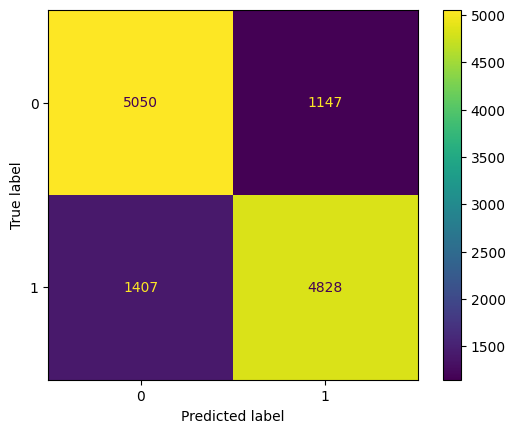

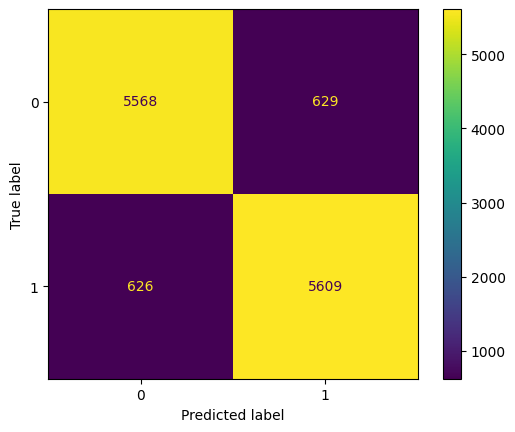

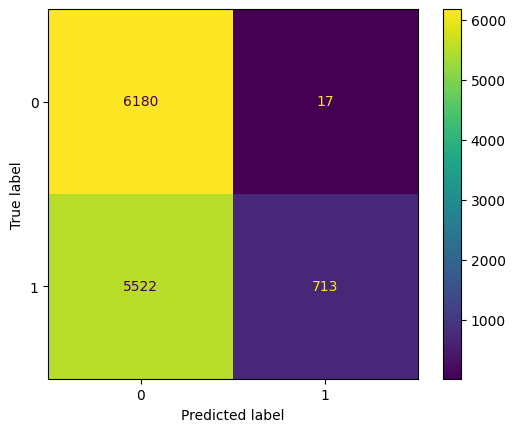

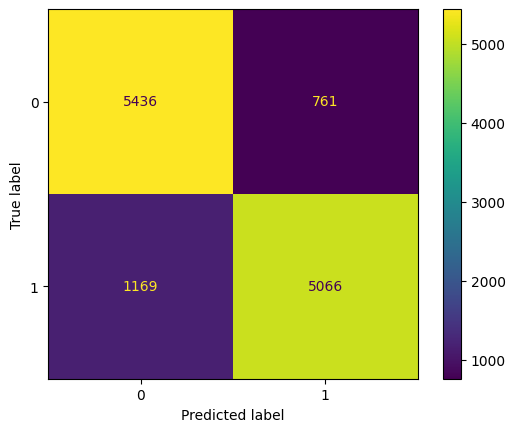

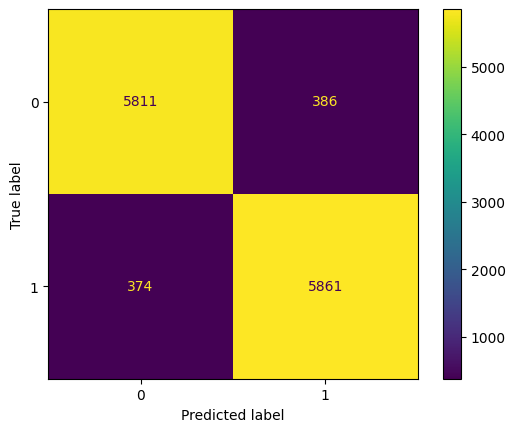

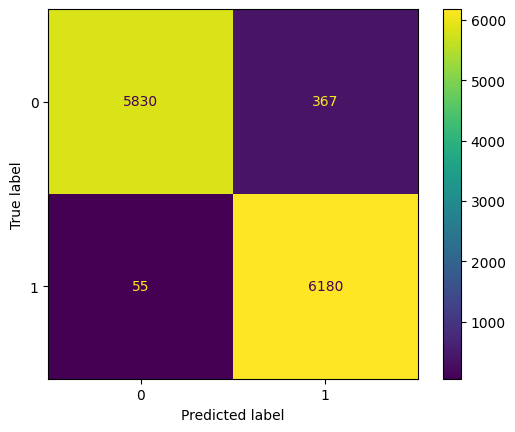

In [ ]:
for i in lst_model:
  print("Model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*****************")
  matrix=confusion_matrix(y_test,y_pred)
  print(matrix)
  label=[0, 1]
  dis=ConfusionMatrixDisplay(matrix,display_labels=label)
  dis.plot()
  print("Acuracy score is",i)
  print(accuracy_score(y_test,y_pred))

In [ ]:
r_model.fit(x_train,y_train)
y_pred1=r_model.predict(x_test)
y_pred1

array([0, 0, 1, ..., 0, 0, 1])

PERFORMANCE EVALUATION.

In [ ]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5895
           1       0.99      0.95      0.97      6537

    accuracy                           0.97     12432
   macro avg       0.97      0.97      0.97     12432
weighted avg       0.97      0.97      0.97     12432



In [ ]:
score1=accuracy_score(y_test,y_pred1)
score1

0.9668597168597168

Random forest stands out as the superior model for prediction.







### **CONCLUSION.**


1.  The dataset contains wildlife strikes recorded from 2005 to 2011. The graph illustrates a steady increase in the number of reported strikes over the years.
2.   Bird strikes happen mostly between March to May, and July to October during the day time.This is typically due to birds migration.Most bird species migrate during spring and fall, with the exact timing varying depending on the species and their location. Spring migration typically occurs from February to June, while fall migration occurs from August to November.

  Suggestions:Airports must strike a balance between aviation safety and environmental conservation.
  Understanding bird migration patterns helps airports take targeted measures to reduce risks.

3. Small birds frequently cause bird strikes, but medium and large birds cause more damage when involved.

  Suggestions:Airports situated near the migration routes of medium to large birds should implement additional safety measures.
2.   Excluding unknown operators, it is visible that Business and Southwest operators are mostly involved in wildlife strikes.

1.   Ignoring unknown Airports, Sacramento INTL Airport experienced most of the incidents,The reason could be that the airport intersects with the birds' migration route.
2.   Bird strikes happen most often during takeoff or landing, especially the approach phase.

 Suggestions:Pilots should be informed with bird information during the approach phase if possible.

2.   
Two-engine aircraft experience the most frequent strikes, but one-engine aircraft are more susceptible to damage when struck.

 Suggestions:Such aircraft should be equipped and operated with caution in this aspect.

1.   Most of the strikes do not cause damages
2.   Pilots are often unaware of the presence of birds; they are not warned about wildlife or birds.

 Suggestions:Precautions should include implementing bird detection systems, providing pilots with real-time bird activity information, and enhancing training on bird strike avoidance strategies.

1.   Among the six models created, Random Forest Clssifier outshines the other model with Accuracy of 96%.












# **THANK YOU.**